# Final Project - Exploratory Data Analysis of Netflix Movies and TV Shows
## Santosh Omprakash

In [559]:
import thinkplot
import pandas as pd 
import numpy as np
import thinkstats2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import hypothesis
from sklearn.linear_model import LinearRegression

### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

In [560]:
# Read netflix csv data
df = pd.read_csv("netflix_titles.csv", engine='python')

# Add new features to dataset - year_added, month_added and season_count
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


### Describe what the 5 variables mean in the dataset (Chapter 1).

#### Important Variables

##### type:
It is the type of content Movies/TV Shows
##### country: 
It is the place where contents are present
##### date_added: 
Date when the contents were added to Netflix
##### release_year: 
Year when the Movies/TV shows were released
##### rating: 
It represents the content type. For example TV-MA is for adults only and may not be suitable for children under 17; TV-G is suitable for all ages.
##### listed_in: 
It is the genre. Example: Comedies, Kid’s TV

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

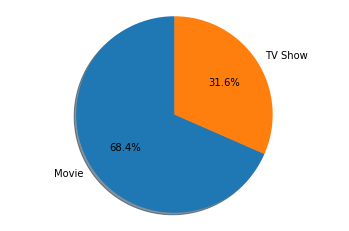

In [561]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
labels = grouped[col]
sizes = grouped['count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

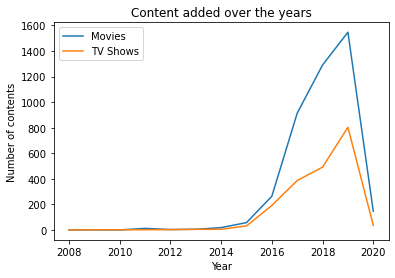

In [562]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

Show_x = vc1[col]
Show_y = vc1["count"]
Mov_x = vc2[col]
Mov_y = vc2["count"]
plt.plot(Mov_x,Mov_y, label="Movies")
plt.plot(Show_x,Show_y, label="TV Shows")
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of contents")
plt.title("Content added over the years")
plt.show()

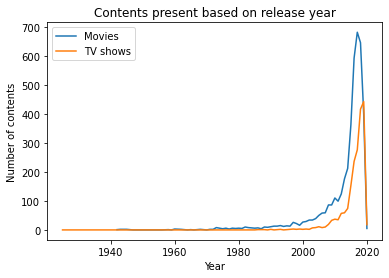

In [563]:
col = "release_year"

# convert column values
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

contv_x = vc1[col]
contv_y = vc1["count"]
conmov_x = vc2[col]
conmov_y = vc2["count"]
plt.plot(conmov_x,conmov_y, label="Movies")
plt.plot(contv_x,contv_y, label="TV shows")
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of contents")
plt.title("Contents present based on release year")
plt.show()

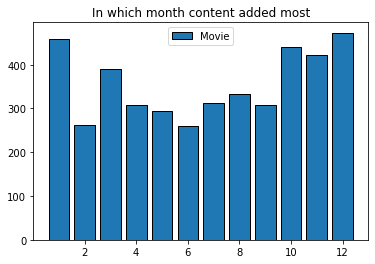

In [564]:
group  = pd.DataFrame({'count' : df.groupby( [ "type", "month_added"] ).size()}).reset_index()
plt.bar(group[group['type']=='Movie']['month_added'],group[group['type']=='Movie']['count'], edgecolor = 'black', 
        label='Movie')
plt.legend()
plt.title("In which month content added most")
plt.show() 

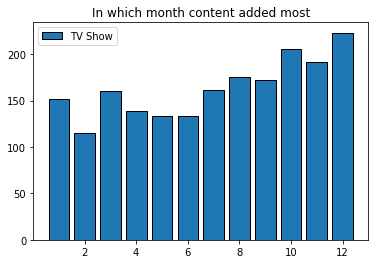

In [565]:
plt.bar(group[group['type']=='TV Show']['month_added'],group[group['type']=='TV Show']['count'], edgecolor = 'black', 
        label='TV Show')
plt.legend()
plt.title("In which month content added most")
plt.show()

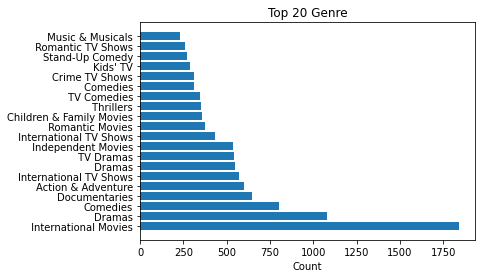

In [566]:
count_genre=Counter(",".join(df["listed_in"].dropna()).split(","))

top_20_genre=count_genre.most_common(20)

genre_name=[]
genre_count=[]
for i in range(20):
    genre_name.append(top_20_genre[i][0])
for i in range(20):
    genre_count.append(top_20_genre[i][1])
    
y_pos=np.arange(len(genre_name))
plt.barh(y_pos, genre_count, align='center', alpha=1)
plt.yticks(y_pos, genre_name)
plt.xlabel('Count')
plt.title('Top 20 Genre')
plt.show()

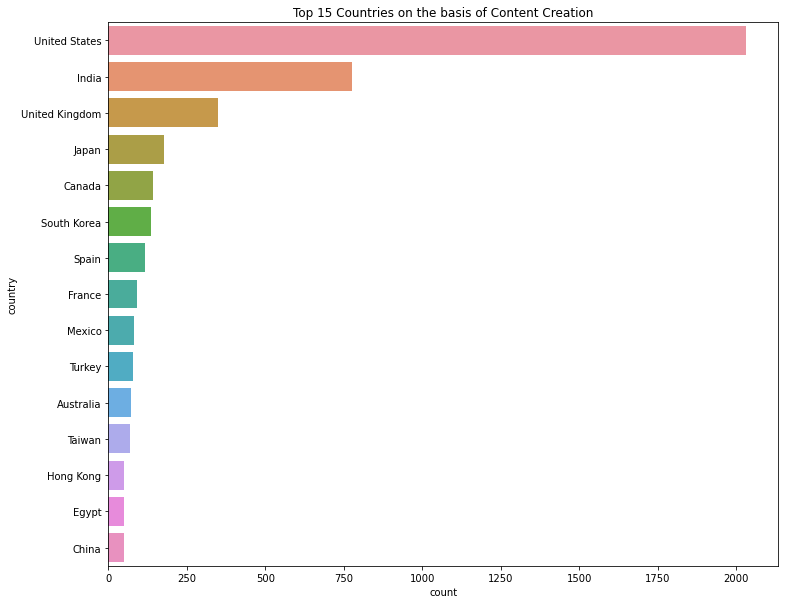

In [567]:
plt.figure(figsize=(12,10))
plt.title('Top 15 Countries on the basis of Content Creation')
sns.countplot(data=df,y='country',order=df['country'].value_counts().index[0:15])
plt.savefig('top_15_coutries.pdf')

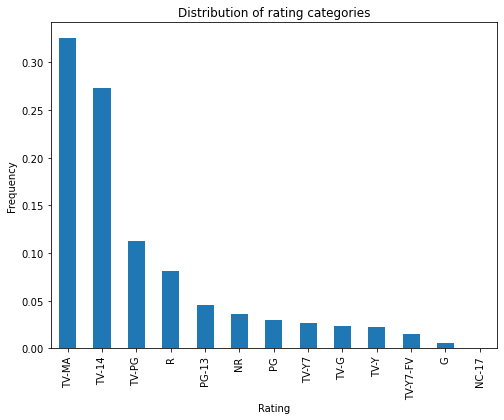

In [568]:
for i in df.index:
    if df.loc[i,"rating"]=='UR':
        df.loc[i,"rating"]='NR'

plt.figure(figsize=(8,6))
df["rating"].value_counts(normalize=True).plot.bar()
plt.title("Distribution of rating categories")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

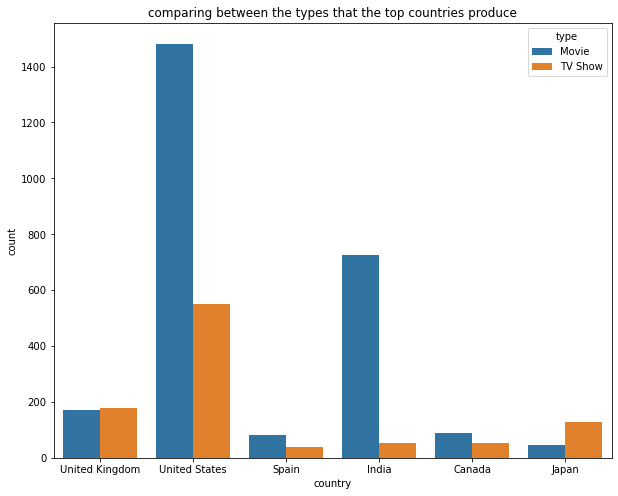

In [569]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|
                            (df['country']=='Japan')|(df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

United Kingdom and Japan have more TV Shows than Movies.

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

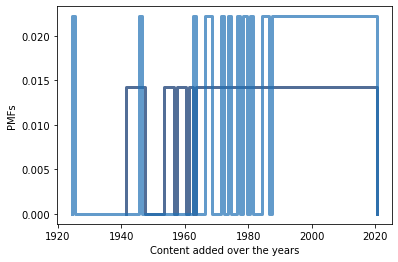

In [570]:
mov_pmf = thinkstats2.Pmf(conmov_x, label = 'Movies')
tvshow_pmf = thinkstats2.Pmf(contv_x, label = 'TV shows')

thinkplot.Pmfs([mov_pmf, tvshow_pmf])
thinkplot.Config(xlabel='Content added over the years', ylabel='PMFs')

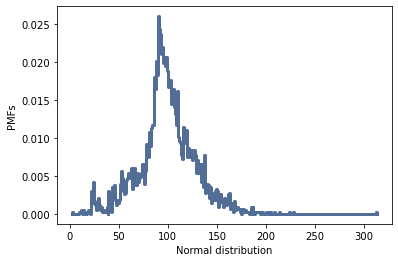

In [571]:
x1 = d2['duration'].fillna(0.0).astype(float)
dur_pmf = thinkstats2.Pmf(x1, label = 'duration')

thinkplot.Pmfs([dur_pmf])
thinkplot.Config(xlabel='Normal distribution', ylabel='PMFs')

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

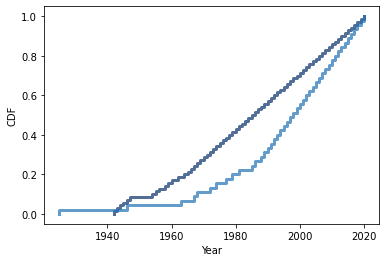

In [572]:
Movies_cdf = thinkstats2.Cdf(conmov_x, label='Movies')
TVshows_cdf = thinkstats2.Cdf(contv_x, label = 'TV Shows')
thinkplot.Cdfs([Movies_cdf, TVshows_cdf])
thinkplot.Config(xlabel = 'Year', ylabel = 'CDF')

The growth in number of movies on netflix is much higher than the TV shows. About 1300 new movies were added in both 2018 and 2019. The growth in content started from 2013. Netflix kept on adding different movies and tv shows on its platform over the years. This content was of different variety - content from different countries, content which was released over the years.

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

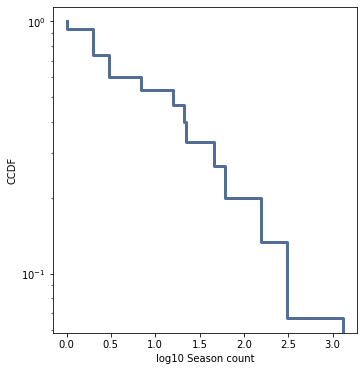

In [573]:
col = 'season_count'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

seas_y=vc1["count"]

log_seas = np.log10(seas_y)
cdf_seas = thinkstats2.Cdf(seas_y, label='data')
cdf_seas_log = thinkstats2.Cdf(log_seas, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=550, alpha=1.1, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')
thinkplot.PrePlot(cols=2)
thinkplot.Cdf(cdf_seas_log, complement=True) 
thinkplot.Config(xlabel='log10 Season count',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

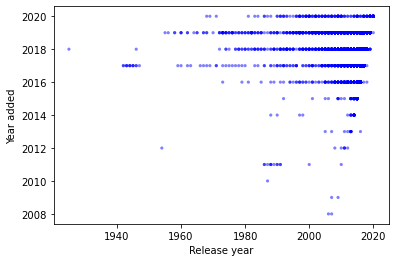

In [574]:
xrel = df.release_year
yadd = df.year_added

thinkplot.Scatter(xrel, yadd, alpha=0.5, s=10)
thinkplot.Config(xlabel='Release year',
                 ylabel='Year added',
                 legend=False)

In [575]:
xrel1 = xrel.fillna(2019)
yadd1 = yadd.fillna(2019)
np.cov(xrel1, yadd1)

array([[77.64465322,  0.49340875],
       [ 0.49340875,  1.45092453]])

Covariance is 0.49

In [576]:
np.corrcoef(xrel1, yadd1)

array([[1.        , 0.04648669],
       [0.04648669, 1.        ]])

Pearson correlation is 0.04

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [577]:
# Test difference between release year and year added
data = xrel1, yadd1
ht = hypothesis.DiffMeansPermute(data)
p1 = ht.PValue(iters=10000)
p1

0.0

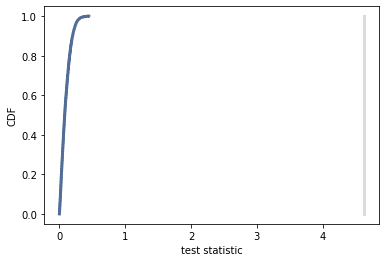

<Figure size 576x432 with 0 Axes>

In [578]:
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic',
               ylabel='CDF')

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [579]:
#df.fillna("Unknown", inplace=True)
df_known_date_added = df.dropna(subset=["date_added"])
total_movies = len(df[:][df["type"] == "Movie"])
total_tv_show = len(df[:][df["type"] == "TV Show"])
print("Total Movies On Netflix : ", total_movies)
print("Total TV Shows On Netflix : ", total_tv_show)

Total Movies On Netflix :  4265
Total TV Shows On Netflix :  1969


In [580]:
def get_dataframe_for_year(df,year):
    
    for index,value in enumerate(df.date_added):
        if year in str(value):  
            df.date_added[index] = int(year)
            
    df = df[df.date_added == int(year)]
       
    return df

In [581]:
df_2010 = get_dataframe_for_year(df,'2010')
df_2011 = get_dataframe_for_year(df,'2011')
df_2012 = get_dataframe_for_year(df,'2012')
df_2013 = get_dataframe_for_year(df,'2013')
df_2014 = get_dataframe_for_year(df,'2014')
df_2015 = get_dataframe_for_year(df,'2015')
df_2016 = get_dataframe_for_year(df,'2016')
df_2017 = get_dataframe_for_year(df,'2017')
df_2018 = get_dataframe_for_year(df,'2018')
df_2019 = get_dataframe_for_year(df,'2019')

C:\Users\oneor\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\oneor\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [582]:
def total_data(df_year):
    total_movies = len(df_year[:][df_year["type"] == "Movie"])
    total_tv_shows = len(df_year[:][df_year["type"] == "TV Show"])
    total_added_movies_shows = total_movies + total_tv_shows
    
    return total_movies, total_tv_shows, total_added_movies_shows

In [583]:
total_movies_2010, total_tv_shows_2010, total_added_movies_shows_2010 = total_data(df_2010)
total_movies_2011, total_tv_shows_2011, total_added_movies_shows_2011 = total_data(df_2011)
total_movies_2012, total_tv_shows_2012, total_added_movies_shows_2012 = total_data(df_2012)
total_movies_2013, total_tv_shows_2013, total_added_movies_shows_2013 = total_data(df_2013)
total_movies_2014, total_tv_shows_2014, total_added_movies_shows_2014 = total_data(df_2014)
total_movies_2015, total_tv_shows_2015, total_added_movies_shows_2015 = total_data(df_2015)
total_movies_2016, total_tv_shows_2016, total_added_movies_shows_2016 = total_data(df_2016)
total_movies_2017, total_tv_shows_2017, total_added_movies_shows_2017 = total_data(df_2017)
total_movies_2018, total_tv_shows_2018, total_added_movies_shows_2018 = total_data(df_2018)
total_movies_2019, total_tv_shows_2019, total_added_movies_shows_2019 = total_data(df_2019)
years = [year for year in range(2010,2020)]

In [584]:
filtered_data = {
    "year" : [year for year in range(2010,2020)], 
    "added movies" : [total_movies_2010, total_movies_2011, total_movies_2012, total_movies_2013, total_movies_2014,
                     total_movies_2015, total_movies_2016, total_movies_2017, total_movies_2018, total_movies_2019], 
    "added TV shows" : [total_tv_shows_2010, total_tv_shows_2011, total_tv_shows_2012, total_tv_shows_2013, total_tv_shows_2014,
                       total_tv_shows_2015, total_tv_shows_2016, total_tv_shows_2017, total_tv_shows_2018, total_tv_shows_2019], 
    "total" : [total_added_movies_shows_2010, total_added_movies_shows_2011, total_added_movies_shows_2012, total_added_movies_shows_2013,
              total_added_movies_shows_2014, total_added_movies_shows_2015, total_added_movies_shows_2016, total_added_movies_shows_2017,
              total_added_movies_shows_2018, total_added_movies_shows_2019]
}
filtered_dataframe = pd.DataFrame(filtered_data)
filtered_dataframe

,year,added movies,added TV shows,total
0,2010,1,0,1
1,2011,13,0,13
2,2012,4,3,7
3,2013,6,6,12
4,2014,19,6,25
5,2015,58,32,90
6,2016,264,192,456
7,2017,913,387,1300
8,2018,1290,492,1782
9,2019,1546,803,2349


In [585]:
reg = LinearRegression()
X = np.array([
    [2015],
    [2016],
    [2017],
    [2018],
    [2019],
])
X_predict = np.array([[2020]])
y = np.array(filtered_dataframe["added movies"][filtered_dataframe["year"]>2014]).flatten()
y.reshape(1,-1)
reg = reg.fit(X,y)
predict = reg.predict(X_predict)
print("Number of movies that could be added in 2020 is : ", int(predict))

Number of movies that could be added in 2020 is :  2014


In [586]:
y = np.array(filtered_dataframe["added TV shows"][filtered_dataframe["year"]>2014]).flatten()
y.reshape(1,-1)
reg = reg.fit(X,y)
predict = reg.predict(X_predict)
print("Number of TV shows that could be added in 2020 is : ", int(predict))

Number of TV shows that could be added in 2020 is :  933
